In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%pip install -q seaborn
import seaborn as sns # statistical data visualization

#-- plotly
%pip install -q chart-studio
import micropip
await micropip.install("ssl")
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#--

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [6]:
data = pd.read_csv('./data/cm1.csv')

### About this Software Defect Prediction Dataset

This is a Promise data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

### *Attribute Information:*

1. loc : numeric % McCabe's line count of code
2. v(g) : numeric % McCabe "cyclomatic complexity"
3. ev(g) : numeric % McCabe "essential complexity"
4. iv(g) : numeric % McCabe "design complexity"
5. n : numeric % Halstead total operators + operands
6. v : numeric % Halstead "volume"
7. l : numeric % Halstead "program length"
8. d : numeric % Halstead "difficulty"
9. i : numeric % Halstead "intelligence"
10. e : numeric % Halstead "effort"
11. b : numeric % Halstead
12. t : numeric % Halstead's time estimator
13. lOCode : numeric % Halstead's line count
14. lOComment : numeric % Halstead's count of lines of comments
15. lOBlank : numeric % Halstead's count of blank lines
16. lOCodeAndComment : numeric
17. uniq_Op : numeric % unique operators
18. uniq_Opnd : numeric % unique operands
19. total_Op : numeric % total operators
20. total_Opnd : numeric % total operands
21. branchCount : numeric % of the flow graph
22. defects : {false,true} % module has/has not one or more reported defects

### Data Discovery & Visualization

In [7]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

In [8]:
data.head() #shows first 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [9]:
data.tail() #shows last 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True
497,28.0,6.0,5.0,5.0,104.0,564.33,0.06,16.09,35.08,9078.38,...,2,7,0,0,20.0,23.0,67.0,37.0,11.0,True


In [10]:
data.sample(10) #shows random rows (sample(number_of_rows))

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
52,32.0,2.0,1.0,2.0,214.0,1284.00,0.05,18.78,68.36,24116.87,...,1,8,12,0,18.0,46.0,118.0,96.0,3.0,False
364,61.0,11.0,7.0,10.0,259.0,1571.12,0.05,18.72,83.91,29416.66,...,6,8,17,0,20.0,47.0,171.0,88.0,21.0,False
305,3.0,1.0,1.0,1.0,7.0,19.65,0.50,2.00,9.83,39.30,...,0,0,2,0,4.0,3.0,4.0,3.0,1.0,False
243,43.0,4.0,1.0,4.0,267.0,1619.65,0.05,19.20,84.37,31093.83,...,1,29,31,0,19.0,48.0,170.0,97.0,7.0,False
205,15.0,4.0,1.0,2.0,109.0,591.46,0.04,25.89,22.84,15315.78,...,7,10,10,0,24.0,19.0,68.0,41.0,7.0,False
178,31.0,5.0,1.0,1.0,67.0,284.61,0.05,19.94,14.28,5674.43,...,1,4,1,0,11.0,8.0,38.0,29.0,9.0,False
317,8.0,1.0,1.0,1.0,11.0,36.54,0.33,3.00,12.18,109.62,...,0,0,0,0,6.0,4.0,7.0,4.0,1.0,False
258,8.0,1.0,1.0,1.0,34.0,146.95,0.20,5.00,29.39,734.73,...,2,5,7,0,8.0,12.0,19.0,15.0,1.0,False
211,44.0,6.0,1.0,4.0,380.0,2490.74,0.03,34.84,71.49,86774.30,...,18,28,33,0,32.0,62.0,245.0,135.0,11.0,False
303,32.0,4.0,1.0,3.0,130.0,744.63,0.06,16.36,45.51,12184.85,...,9,31,22,0,20.0,33.0,76.0,54.0,7.0,False


In [11]:
data.shape #shows the number of rows and columns

(498, 22)

In [12]:
data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,1938.056124,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,7453.591519,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,33.672500,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,204.310000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,924.075000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,119649.480000,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


In [13]:
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  449
True :  49


### -> Histogram

In [ ]:
%pip install --upgrade nbformat
#%pip install micropip
#micropip.install(..., keep_going=True)
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

### -> Covariance

Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

In [14]:
data.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.942908,0.773607,0.919270,0.940466,0.952699,-0.357998,0.728502,0.797565,0.814611,...,0.679721,0.862704,0.679942,-0.040300,0.803036,0.943241,0.941778,0.929347,0.940823,0.246467
v(g),0.942908,1.000000,0.806544,0.929741,0.907581,0.919714,-0.342571,0.773446,0.668793,0.856458,...,0.733292,0.795747,0.666712,-0.029726,0.801255,0.860150,0.910242,0.894691,0.991826,0.166761
ev(g),0.773607,0.806544,1.000000,0.714994,0.770008,0.773645,-0.280011,0.675765,0.554699,0.685490,...,0.605862,0.682972,0.568783,-0.020170,0.649567,0.710749,0.775750,0.753672,0.829226,0.105047
iv(g),0.919270,0.929741,0.714994,1.000000,0.870063,0.889894,-0.300078,0.679901,0.696397,0.826191,...,0.674501,0.739883,0.647548,-0.024960,0.755188,0.857157,0.873645,0.856111,0.911202,0.202645
n,0.940466,0.907581,0.770008,0.870063,1.000000,0.993306,-0.397294,0.841433,0.810141,0.844168,...,0.727183,0.794619,0.731518,-0.038936,0.837047,0.947383,0.997563,0.994124,0.912958,0.214049
v,0.952699,0.919714,0.773645,0.889894,0.993306,1.000000,-0.346625,0.797672,0.792191,0.876855,...,0.731986,0.813944,0.721394,-0.032055,0.808148,0.948709,0.990824,0.987568,0.920633,0.206623
l,-0.357998,-0.342571,-0.280011,-0.300078,-0.397294,-0.346625,1.000000,-0.540916,-0.404108,-0.196933,...,-0.266412,-0.289062,-0.331775,0.398689,-0.629990,-0.402986,-0.397856,-0.392290,-0.358672,-0.132567
d,0.728502,0.773446,0.675765,0.679901,0.841433,0.797672,-0.540916,1.000000,0.514898,0.717773,...,0.614364,0.614590,0.642382,-0.057531,0.884115,0.697731,0.840947,0.834040,0.773032,0.168173
i,0.797565,0.668793,0.554699,0.696397,0.810141,0.792191,-0.404108,0.514898,1.000000,0.468739,...,0.511707,0.645486,0.580700,-0.060712,0.649853,0.914101,0.809787,0.802842,0.699037,0.267764
e,0.814611,0.856458,0.685490,0.826191,0.844168,0.876855,-0.196933,0.717773,0.468739,1.000000,...,0.664990,0.683293,0.591581,-0.015676,0.656657,0.715288,0.842162,0.839142,0.825467,0.097784


### -> Heatmap

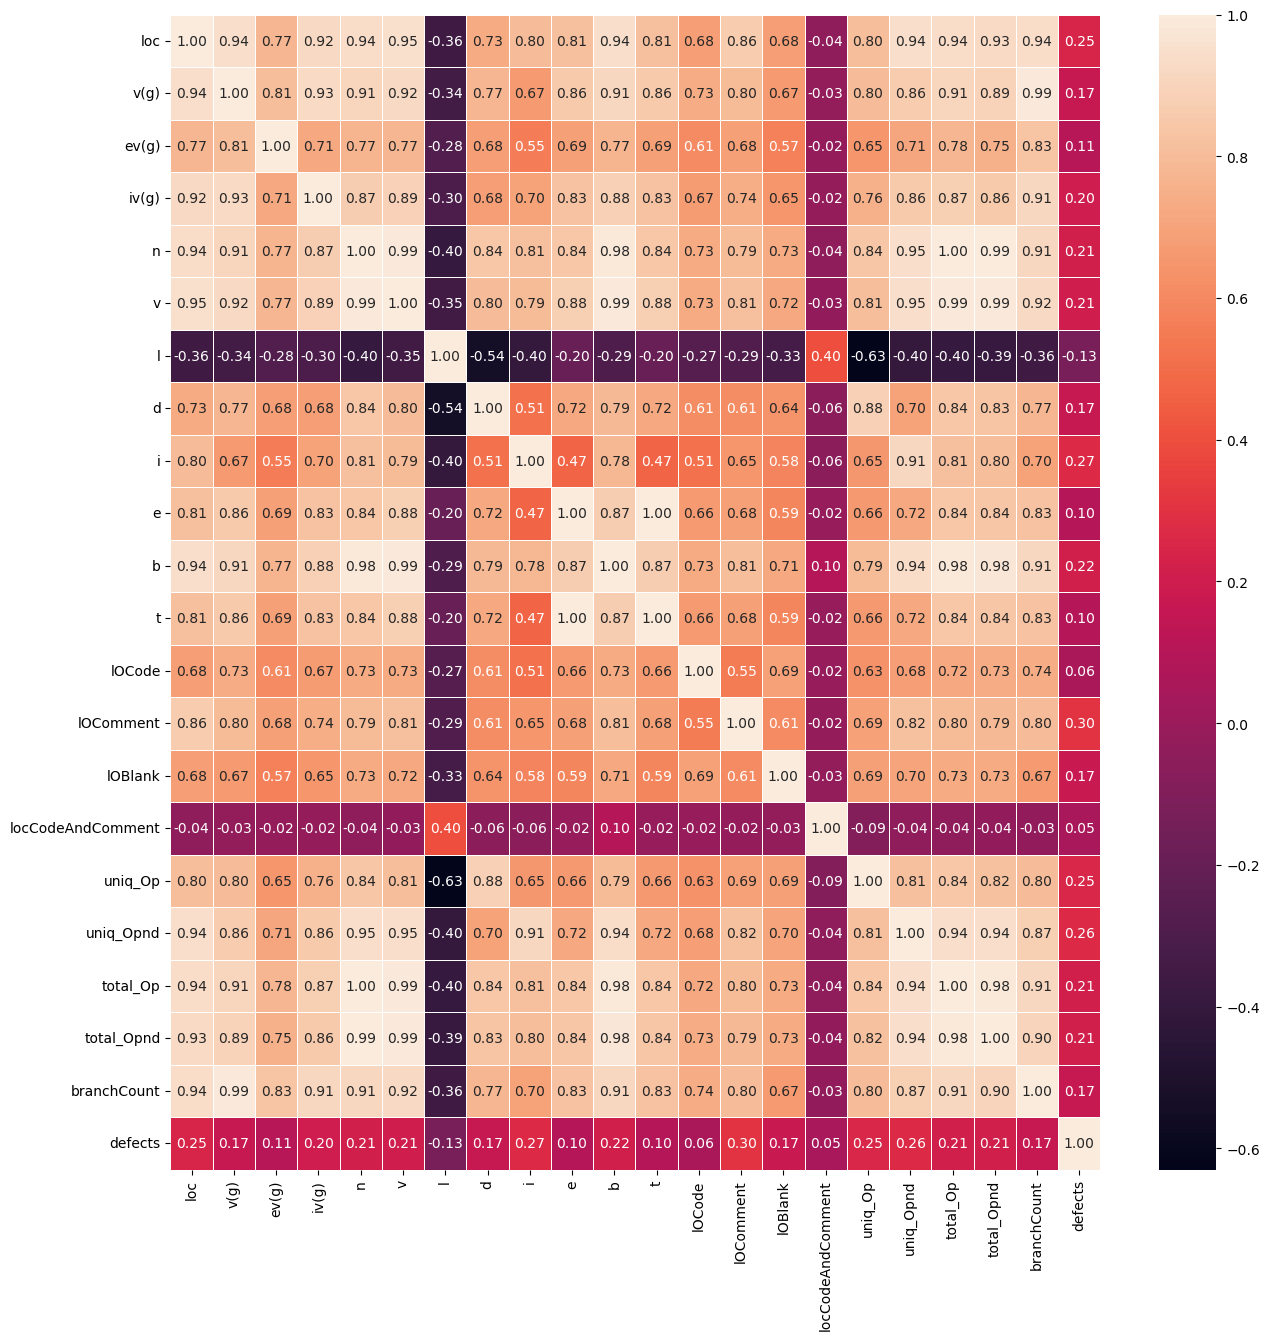

In [15]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)

The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)

### -> Scatter Plot

In [ ]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

#two attributes with high correlation v-b > just about 1

### -> Data Preprocessing

In [16]:
data.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

No missing value.

No data cleaning needed because the data is all important.

### -> Outlier Detection (Box Plot)

In [ ]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

Showing all information when clicking on plot (min, max, q1, q2, etc.).

### -> Feature Extraction

In [17]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [18]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,6,0,15.0,15.0,44.0,19.0,9.0,False,Succesful
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,3,0,16.0,8.0,31.0,16.0,7.0,False,Succesful
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,False,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,13,2,0,23.0,46.0,144.0,112.0,5.0,True,Redesign
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,7,4,0,22.0,23.0,67.0,40.0,7.0,True,Succesful
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,59,35,0,32.0,68.0,285.0,190.0,21.0,True,Redesign
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,12,4,0,13.0,13.0,19.0,13.0,3.0,True,Succesful


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

In [20]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Redesign     112
Succesful    386
dtype: int64

In [ ]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

### -> Data Normalization (Min-Max Normalization)

In [21]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000076,0.227671
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000058,0.175131
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,15.0,15.0,44.0,19.0,9.0,False,Succesful,0.018052,0.017513
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,16.0,8.0,31.0,16.0,7.0,False,Succesful,0.012584,0.012259
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,16.0,12.0,46.0,26.0,11.0,False,Succesful,0.020213,0.021016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,0,23.0,46.0,144.0,112.0,5.0,True,Redesign,0.091319,0.091068
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,0,22.0,23.0,67.0,40.0,7.0,True,Succesful,0.034316,0.035026
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,0,32.0,68.0,285.0,190.0,21.0,True,Redesign,0.184290,0.183888
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,0,13.0,13.0,19.0,13.0,3.0,True,Succesful,0.008783,0.008757


In [22]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000076,0.227671
1,1.00,1.00,0.000058,0.175131
2,309.13,0.10,0.018052,0.017513
3,215.49,0.07,0.012584,0.012259
4,346.13,0.12,0.020213,0.021016
...,...,...,...,...
493,1563.78,0.52,0.091319,0.091068
494,587.63,0.20,0.034316,0.035026
495,3155.83,1.05,0.184290,0.183888
496,150.41,0.05,0.008783,0.008757


### -> Model Selection

### 1. Naive Bayes

In [ ]:
data.info()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [ ]:
Y

In [ ]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [ ]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
#Calculation of ACC value by K-fold cross validation of NB model
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

In [ ]:
cv_results

In [ ]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

### 2. Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

### 3. SVM


In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='linear', C=0.01)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))


### 4. Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=100)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forest Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

## 5. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

## 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Regression Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

## ->> Lasso Regression

In [135]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

In [136]:
data = pd.read_csv('../data/cm1.csv')
print(data.head())

    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2          1.4    Fals

In [137]:
print (data.shape)

(498, 22)


In [219]:
X = data.drop(['loc','defects'],axis=1)
# X = data.iloc[:, :-10]
y = data['defects']

In [220]:
y

0      False
1       True
2      False
3      False
4      False
       ...  
493     True
494     True
495     True
496     True
497     True
Name: defects, Length: 498, dtype: bool

In [221]:
from sklearn.preprocessing import MinMaxScaler

In [222]:
scaling=MinMaxScaler()

In [223]:
scaling.fit_transform(X)

array([[4.21052632e-03, 1.37931034e-02, 6.45161290e-03, ...,
        1.58730159e-04, 1.47420147e-03, 2.48447205e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.22850123e-03, 0.00000000e+00],
       [4.21052632e-02, 0.00000000e+00, 3.22580645e-02, ...,
        3.41269841e-02, 2.33415233e-02, 4.96894410e-02],
       ...,
       [1.05263158e-01, 6.89655172e-02, 1.45161290e-01, ...,
        2.25396825e-01, 2.33415233e-01, 1.24223602e-01],
       [1.05263158e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.42857143e-02, 1.59705160e-02, 1.24223602e-02],
       [5.26315789e-02, 1.37931034e-01, 6.45161290e-02, ...,
        5.23809524e-02, 4.54545455e-02, 6.21118012e-02]])

In [224]:
new1_X = pd.DataFrame(scaling.fit_transform(X))
new1_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,0.227671,0.000011,0.0250,0.005900,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484
1,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,0.175131,0.000008,0.0125,0.002950,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000
2,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,0.017513,0.001364,0.0125,0.000000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689
3,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,0.012259,0.001601,0.0000,0.000000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267
4,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,0.021016,0.002786,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.021053,0.000000,0.032258,0.122951,0.091319,0.030769,0.222629,0.190173,2.033064e-02,0.091068,0.020331,0.0250,0.038348,0.012195,0.0,0.309859,0.146497,0.113492,0.137592,0.024845
494,0.031579,0.068966,0.032258,0.051109,0.034316,0.038462,0.152103,0.104604,5.219682e-03,0.035026,0.005220,0.0125,0.020649,0.024390,0.0,0.295775,0.073248,0.052381,0.049140,0.037267
495,0.105263,0.068966,0.145161,0.228544,0.184290,0.015385,0.355490,0.240364,6.550813e-02,0.183888,0.065508,0.1125,0.174041,0.213415,0.0,0.436620,0.216561,0.225397,0.233415,0.124224
496,0.010526,0.000000,0.000000,0.014947,0.008783,0.115385,0.051682,0.078793,4.539603e-04,0.008757,0.000454,0.0125,0.035398,0.024390,0.0,0.169014,0.041401,0.014286,0.015971,0.012422


In [225]:
standardScaling = StandardScaler()

In [226]:
new2_X = pd.DataFrame(standardScaling.fit_transform(new1_X))
new2_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,-0.260268,1.760256,-0.260103,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871
1,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,-0.260270,1.229686,-0.260144,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436
2,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,-0.238366,-0.362023,-0.238367,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125
3,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,-0.234552,-0.415080,-0.234553,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953
4,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,-0.326652,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,0.066410,0.380774,0.066410,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781
494,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,-0.176404,-0.185167,-0.176404,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953
495,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,0.792355,1.318114,0.792354,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842
496,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,-0.252983,-0.450452,-0.252983,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609


In [227]:
X_train,X_test,y_train,y_test=train_test_split(new2_X,y,test_size=0.2,random_state=0,stratify=y)
X_train.shape,X_test.shape

((398, 20), (100, 20))

In [228]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [229]:
X_train_filter.shape,X_test_filter.shape

((398, 20), (100, 20))

In [230]:
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T
X_train_T.shape,X_test_T.shape

((20, 398), (20, 100))

In [231]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [232]:
X_train_unique=X_train_T.T
X_test_unique=X_test_T.T

In [233]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))
scaler.fit(X_test.fillna(0))

StandardScaler()

In [234]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

<class 'ValueError'>: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [235]:
sel_.get_support()

<class 'ValueError'>: when `importance_getter=='auto'`, the underlying estimator LogisticRegression should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [267]:
lected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrink to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

<class 'ValueError'>: when `importance_getter=='auto'`, the underlying estimator LogisticRegression should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [237]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

<class 'AttributeError'>: 'LogisticRegression' object has no attribute 'coef_'

In [238]:
remaining_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
remaining_feats
X_train.shape

<class 'AttributeError'>: 'LogisticRegression' object has no attribute 'coef_'

In [239]:
new3_X=new2_X.drop([1, 4, 5, 7, 10, 12, 15, 17, 18, 19],axis=1)
new3_X

,0,2,3,6,8,9,11,13,14,16
0,-0.477556,-0.389989,-0.646007,-0.948668,-0.260268,1.760256,-0.210250,-0.477629,19.935901,-0.715579
1,-0.525524,-0.463264,-0.647366,-0.968256,-0.260270,1.229686,-0.327896,-0.527725,9.937836,-0.721480
2,-0.045848,-0.096890,-0.366604,-0.413265,-0.238366,-0.362023,-0.327896,-0.277242,-0.060229,-0.308400
3,-0.165767,-0.280077,-0.439059,0.011140,-0.234552,-0.415080,-0.445541,-0.427532,-0.060229,-0.514940
4,0.074070,-0.280077,-0.325849,0.097980,-0.215514,-0.326652,-0.445541,-0.427532,-0.060229,-0.396917
...,...,...,...,...,...,...,...,...,...,...
493,-0.285686,-0.096890,0.507380,0.794657,0.066410,0.380774,-0.210250,-0.477629,-0.060229,0.606277
494,-0.165767,-0.096890,-0.167354,0.215508,-0.176404,-0.185167,-0.327896,-0.377435,-0.060229,-0.072354
495,0.673665,1.185417,1.499103,1.885705,0.792355,1.318114,0.613269,1.175562,-0.060229,1.255403
496,-0.405605,-0.463264,-0.506985,-0.609144,-0.252983,-0.450452,-0.327896,-0.377435,-0.060229,-0.367411


In [254]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [255]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [256]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(new3_X,y,test_size=0.2,random_state=101,stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93        90
        True       0.20      0.10      0.13        10

    accuracy                           0.87       100
   macro avg       0.55      0.53      0.53       100
weighted avg       0.83      0.87      0.85       100



In [257]:
import array as arr

In [258]:
f1_mean_array = arr.array('d',[])

In [259]:
for x in range(10):
    scores = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [260]:
f1_mean_array

array('d', [0.5083155039279736, 0.47243976447639346, 0.4730117159749064, 0.4730117159749064, 0.4872408371649784, 0.47243976447639346, 0.47243976447639346, 0.4878007475793121, 0.4724518055605727, 0.4730117159749064])

In [261]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

4.792163335586737


In [262]:
final_f1_score = sum/10
final_f1_score

0.47921633355867366

In [263]:
roc_mean_array = arr.array('d',[])

In [264]:
for x in range(10):
    scores_2 = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [265]:
roc_mean_array

array('d', [0.6851313131313133, 0.6748535353535353, 0.6689848484848485, 0.6956616161616161, 0.6750151515151515, 0.6632171717171718, 0.692010101010101, 0.680979797979798, 0.6956060606060606, 0.6637070707070707])

In [266]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

6.795166666666667


In [253]:
final_roc_score = sum/10
final_roc_score

0.0

# Nature inspired optimization 

## 1. Harris Hawks Optimisation Algorithm

In [131]:
import sys
sys.path.append('./')
import HHO as hho
import GA as ga
import functions
import csv
import numpy
import time

# Fonksiyon Değerleri
def selector(algo,func_details,popSize,Iterasyon):
    function_name=func_details[0]
    lb=func_details[1]
    ub=func_details[2]
    dim=func_details[3]
    x=hho.HHO(getattr(functions, function_name), lb, ub, dim, popSize, Iterasyon)

    # Algoritma listesi
    if(algo==0):
        x=hho.HHO(getattr(functions, function_name),lb,ub,dim,popSize,Iterasyon)
    if(algo==1):
        x=ga.GA(getattr(functions, function_name),lb,ub,dim,popSize,Iterasyon)
    return x

# Çalışmasını istediğiniz algoritmaları "True" ile belirtiniz.
HHO=True
GA=False

# Çalışmasını istediğiniz fonksiyonları "True" ile belirtiniz.
F1=True
F2=True
F3=True
F4=True
F5=True
F6=True
F7=True
F8=True
F9=True
F10=True
F11=True
F12=True
F13=True
F14=True
F15=True
F16=True
F17=True
F18=True
F19=True
F20=True
F21=True
F22=True
F23=True

algorithm=[HHO,GA]
func=[F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23]
        
# Fonksiyonun tekrar sayısını belirtiniz
FuncAgain=1

# Genel Parametreler
PopulationSize = 500
Iterations= 50

# Excel formatında çıktı almak isterseniz "True" ile belirtiniz.
Export=True

# ExportToFile= Dosya adı ve formatı
ExportToFile="kontrol-"+time.strftime("%Y-%m-%d-%H-%M-%S")+".csv"

# En az bir kere çalışıp çalışmadığını kontrol eden değişken
Flag=True

# İterasyon isimlerinin gönderileceği değişken dizisi
CnvgHeader=[]
for l in range(0,Iterations):
	CnvgHeader.append("Iterasyon - "+str(l+1))

for i in range (0, len(algorithm)): # Algoritma dizisindeki değerleri kontrol eder
    for j in range (0, len(func)): # Fonksiyon dizisindeki değerleri kontrol eder
        if((algorithm[i]==True) and (func[j]==True)): # Değerlerin "True" olup olmadığını kontrol eder
            for k in range (0,FuncAgain): # Fonksiyonların kaç kez çalışacağını kontrol eder

                func_details=functions.getFunctionDetails(j)
                x=selector(i,func_details,PopulationSize,Iterations)
                if(Export==True): # CSV formatında çıktı alınıp alınmayacağını kontrol eder
                    with open(ExportToFile, 'a',newline='\n') as out:
                        writer = csv.writer(out,delimiter=',')
                        if (Flag==False): # just one time to write the header of the CSV file
                            # header= numpy.concatenate([["Algoritma","Fonksiyon","Baslama Zamani","Bitis Zamani","Calisma Suresi"],CnvgHeader])
                            header= numpy.concatenate([["Algoritma","Fonksiyon","Calisma Suresi"],CnvgHeader])
                            writer.writerow(header)
                        # a=numpy.concatenate([[x.optimizer,x.objfname,x.startTime,x.endTime,x.executionTime],x.convergence])
                        a=numpy.concatenate([[x.optimizer,x.objfname,x.executionTime],x.convergence])
                        writer.writerow(a)
                    out.close()
                Flag=True # at least one experiment

if (Flag==False): # Faild to run at least one experiment
    print("No Optomizer or Cost function is selected. Check lists of available optimizers and cost functions")

HHO is now tackling  "F1"
['At iteration 0 the best fitness is 49441.35710365621']
['At iteration 1 the best fitness is 6522.562862803579']
['At iteration 2 the best fitness is 93.77052917091073']
['At iteration 3 the best fitness is 16.44421539747803']
['At iteration 4 the best fitness is 5.563884151484764']
['At iteration 5 the best fitness is 1.67004739394293']
['At iteration 6 the best fitness is 0.07084773847365676']
['At iteration 7 the best fitness is 0.04484891678343762']
['At iteration 8 the best fitness is 0.005948260463937372']
['At iteration 9 the best fitness is 0.0028832901860545105']
['At iteration 10 the best fitness is 1.5030101712094465e-06']
['At iteration 11 the best fitness is 1.5030101712094465e-06']
['At iteration 12 the best fitness is 7.784296469563615e-07']
['At iteration 13 the best fitness is 7.784296469563615e-07']
['At iteration 14 the best fitness is 2.5498238699760802e-08']
['At iteration 15 the best fitness is 8.595939208621485e-09']
['At iteration 16 t

## 2. Particle swarm optimization algorithm

In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pit 
import random
from pathlib import Path
%pip install -q pyswarms
import pyswarms as ps

In [133]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed (RANDOM_SEED)
NUM_MEALS = 21
NUM_FOOD = 70
MAX_CALORIES = 180 * 7
SWARM_SIZE = 30
NUM_ITER = 100
basepath = Path(' .')
data = pd.read_csv (basepath/'../data/jm_1.csv')
food = data[ 'Food']
cal_lookup = data ['Calories'].values
utility = data['utility'].values*-1

In [134]:
data.head()

,Food,Calories,utility,Carbohydrates,Fat,protein,Category
0,A,671,60,0.30,0.30,0.07,Others
1,B,1022,87,0.21,0.21,0.15,Noodle
2,B,722,78,0.13,0.13,0.30,Rice
3,A,4443,87,0.15,0.15,0.21,Rice
4,B,3432,65,0.21,0.21,0.13,Kway


### PSO Modeling

In [ ]:
def f_per_particle(m, max_cal):
    j = 0
    if np.count_nonzero (m) != NUM_MEALS:
        j += 5e4
    j += utility [np.where (m==1)].sum()
    cal_budget = cal_lookup [np.where (m==1)] .sum()
    if cal_budget > max_cal:
        j += cal_budget
    return j

In [ ]:
def f(x, max_cal = MAX_CALORIES):
    n_particles = x.shape [0]
    j = [f_per_particle (x[i], max_cal) for i in range (n_particles)]
    return np.array (j)

In [ ]:
def run_model (options):
    optimizer = ps.discrete. BinaryPSO(n_particles=SWARM_SIZE, dimensions=NUM_FOOD, options=options)
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)
    print('f No. of food items selected: {pos.sum ()}')
    print('f Avg calorie/day: {cal_ lookup [np.where (pos==1)].sum()/7}')
    print('\nModel Run times: ')
    return cost, pos, optimizer.cost_history

In [ ]:
def plot_history(history):
    pit.style.use('ggplot')
    plt.rcParams ['ytick.right'] = True
    plt.rcParams['ytick.labelright']= True 
    pit.rcParams ['ytick.left'] = False
    plt.rcParams ['ytick.labelleft'] = False
    pit.rcParams ['font.family'] = 'Arial'
    pit.ylim([min (history)-1000,max(history)+500])
    pit.title('Cost History')
    plt.plot (history)

In [ ]:
checkpoint_state = np.random.get_state()

In [ ]:
%%time
np.random.set_state(checkpoint_state)

In [ ]:
options = {'c1': 0.4, 'c2': 0.4, 'W':0.7, 'k': SWARM_SIZE, 'p':2}
cost, pos, history = run_model(options)

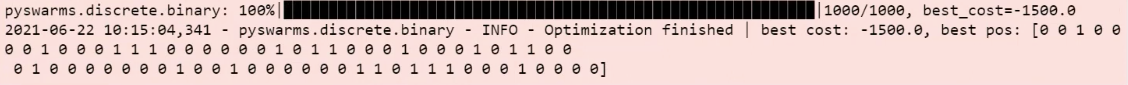

In [ ]:
plot_history(history)

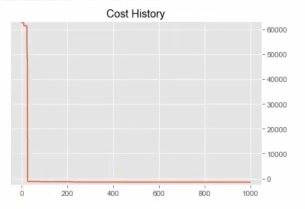

In [ ]:
%%time
np.random.set_state (checkpoint_state)

In [ ]:
options = {'cl': 1, 'c2': 2, 'w':0.9, 'k': SWARM_SIZE, 'p' :1}
cost, pos, history = run_model (options)

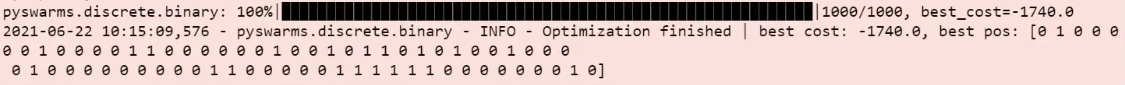

In [ ]:
plot_history(history)

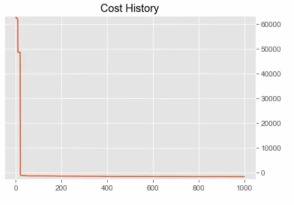

## 3. BAT Algorithm

In [2]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

class BatAlgorithm:
    def __init__(self, population_size, frequency_min, frequency_max, pulse_rate, alpha, gamma, iterations):
        self.population_size = population_size
        self.frequency_min = frequency_min
        self.frequency_max = frequency_max
        self.pulse_rate = pulse_rate
        self.alpha = alpha
        self.gamma = gamma
        self.iterations = iterations

    def init_bats(self, data, labels):
        self.data = data
        self.labels = labels
        self.dimension = data.shape[1]
        self.population = np.zeros((self.population_size, self.dimension))
        self.velocity = np.zeros((self.population_size, self.dimension))
        self.frequency = np.zeros(self.population_size)
        self.loudness = np.zeros(self.population_size)
        self.pulse_rate_i = np.zeros(self.population_size)
        self.solution_fitness = np.zeros(self.population_size)
        self.best_solution = np.zeros(self.dimension)
        self.best_fitness = np.inf

        for i in range(self.population_size):
            self.population[i] = np.random.uniform(low=-1, high=1, size=self.dimension)
            self.velocity[i] = np.zeros(self.dimension)
            self.frequency[i] = np.random.uniform(low=self.frequency_min, high=self.frequency_max)
            self.loudness[i] = 1.0
            self.pulse_rate_i[i] = np.random.uniform(low=0, high=1)

            # Evaluate fitness of initial population
            fitness = self.evaluate_fitness(self.population[i])
            self.solution_fitness[i] = fitness

            # Update best solution
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = self.population[i]

    def evaluate_fitness(self, solution):
        classifier = KNeighborsClassifier()
        X_train, X_test, y_train, y_test = train_test_split(self.data, self.labels, test_size=0.3, random_state=42)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        fitness = 1 - accuracy_score(y_test, y_pred)
        return fitness

    def update_bats(self, iteration):
        for i in range(self.population_size):
            # Update frequency
            self.frequency[i] = self.frequency_min + (self.frequency_max - self.frequency_min) * np.random.uniform()

            # Update velocity
            self.velocity[i] += (self.population[i] - self.best_solution) * self.frequency[i]

            # Update position
            self.population[i] += self.velocity[i]

            # Apply random walk
            if np.random.uniform() > self.pulse_rate_i[i]:
                self.population[i] = self.best_solution + np.random.uniform(low=-1, high=1, size=self.dimension) * self.loudness[i]

            # Evaluate fitness
            fitness = self.evaluate_fitness(self.population[i])

            # Update pulse rate and loudness
            if fitness < self.solution_fitness[i] and np.random.uniform() < self.pulse_rate:
                self.solution_fitness[i] = fitness
                self.pulse_rate_i[i] *= (1 - np.exp(-self.gamma * iteration))
               

In [3]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv("../data/jm1.csv")

# Replace missing values with NaN
data = data.replace('?', np.nan)

# Fill missing values with a numerical value
data = data.fillna(-1)

# Separate the features and labels into separate variables
X = data.drop("defects", axis=1)
y = data["defects"].astype(int) # Convert boolean labels to integer

In [4]:
bat_algorithm = BatAlgorithm(population_size=10, frequency_min=0.0, frequency_max=2.0, pulse_rate=0.5, alpha=0.9, gamma=0.9, iterations=50)

In [5]:
bat_algorithm.init_bats(X, y)

In [6]:
for i in range(bat_algorithm.iterations):
    bat_algorithm.update_bats(i)

In [7]:
classifier = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: ", accuracy)
print("F1 score: ", f1)

Accuracy:  0.7792406613594611
F1 score:  0.7465133011855375


## 4. Ant Colony Optimisation Algorithm

In [27]:
import numpy as np

class ACO:
    def __init__(self, num_ants=10, max_iter=100, pheromone_decay=0.5, alpha=1, beta=2):
        self.num_ants = num_ants
        self.max_iter = max_iter
        self.pheromone_decay = pheromone_decay
        self.alpha = alpha
        self.beta = beta
        
    def fit(self, X, y, clf):
        self.num_features = X.shape[1]
        self.pheromone = np.ones(self.num_features)
        self.feature_indices = np.arange(self.num_features)
        self.best_features = []
        self.best_score = -1
        
        for i in range(self.max_iter):
            ant_scores = []
            ant_features = []
            for j in range(self.num_ants):
                features = self.select_features()
                score = self.evaluate_features(features, X, y, clf)
                ant_scores.append(score)
                ant_features.append(features)
                if score > self.best_score:
                    self.best_score = score
                    self.best_features = features
            self.update_pheromone(ant_features, ant_scores)
        return self.best_features
        
    def select_features(self):
        features = []
        for i in range(self.num_features):
            pheromone_prob = self.pheromone[i] / np.sum(self.pheromone)
            rand_prob = np.random.rand()
            if rand_prob <= pheromone_prob:
                features.append(self.feature_indices[i])
        return features
    
    # def evaluate_features(self, features, X, y, clf):
    #     X_sub = X.iloc[:, features]
    #     X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.3, random_state=42)
    #     clf.fit(X_train, y_train)
    #     y_pred = clf.predict(X_test)
    #     score = f1_score(y_test, y_pred, average='weighted')
    #     return score
    
    def evaluate_features(self, features, X, y, clf):
        if len(features) == 0:
            return -1
        X_sub = X.iloc[:, features]
        X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.3, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = f1_score(y_test, y_pred, average='weighted')
        return score
    
    def update_pheromone(self, ant_features, ant_scores):
        delta_pheromone = np.zeros(self.num_features)
        for features, score in zip(ant_features, ant_scores):
            for feature in features:
                delta_pheromone[feature] += score
        self.pheromone = self.pheromone * self.pheromone_decay + delta_pheromone
     

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
# %pip install --no-binary aco-pants aco-pants
# from aco import ACO

# Load the dataset
data = pd.read_csv("../data/jm1.csv")

# Replace missing values with NaN
data = data.replace('?', np.nan)

# Drop rows with missing values
data = data.dropna()

# Separate the features from the target variable
X = data.drop('defects', axis=1)
y = data['defects']

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42)

# Initialize the ACO algorithm with the parameters
aco = ACO(num_ants=10, max_iter=100, pheromone_decay=0.5, alpha=1, beta=2)

# Set the classifier to be used
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the ACO algorithm on the training set
selected_features = aco.fit(X_train, y_train, clf)

# Train the classifier using the selected features
clf.fit(X_train.iloc[:, selected_features], y_train)

# Predict on the testing set using the trained classifier
y_pred = clf.predict(X_test.iloc[:, selected_features])

# Calculate the accuracy and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)


Accuracy: 0.7858455882352942
F1 score: 0.7605301249081381


## 5. FireFly Algorithm

In [87]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Define the Firefly Algorithm function
def firefly_algorithm(X_train, y_train, X_test, y_test, n_features, population_size=50, max_generations=100, alpha=0.5, beta=0.2, gamma=1.0):
    
    # Initialize the population
    population = np.random.randint(2, size=(population_size, n_features))
    
    # Iterate over generations
    for t in range(max_generations):
        
        # Evaluate the fitness of each individual
        fitness = np.zeros(population_size)
        for i in range(population_size):
            y_pred = np.dot(X_train, population[i])
            fitness[i] = accuracy_score(y_train, y_pred.round())
        
        # Sort the population by fitness
        indices = np.argsort(fitness)[::-1]
        population = population[indices]
        fitness = fitness[indices]
        
        # Iterate over fireflies
        for i in range(population_size):
            for j in range(population_size):
                if fitness[j] > fitness[i]:
                    r = np.sqrt(np.sum((population[i]-population[j])**2))
                    beta_ = beta * np.exp(-gamma * r**2)
                    population[i] = population[i].astype(float)
                    population[j] = population[j].astype(float)
                    population = population.astype(float)
                    population[i] += alpha * beta_ * (population[j] - population[i]) + np.random.uniform(-1, 1, n_features).astype(float)
                    # population[i] += alpha * beta_ * (population[j] - population[i]) + np.random.uniform(-1, 1, n_features)
        
        # Apply mutation
        for i in range(population_size):
            for j in range(n_features):
                if np.random.rand() < 0.01:
                    population[i,j] = 1 - population[i,j]
        
    # Find the best individual and evaluate its performance on the test set
    fitness = np.zeros(population_size)
    for i in range(population_size):
        y_pred = np.dot(X_train, population[i])
        fitness[i] = accuracy_score(y_train, y_pred.round())
    best_index = np.argmax(fitness)
    y_pred = np.dot(X_test, population[best_index])
    test_accuracy = accuracy_score(y_test, y_pred.round())
    test_f1_score = f1_score(y_test, y_pred.round(), average='weighted')
    
    return test_accuracy, test_f1_score

# Load the dataset
data = pd.read_csv("../data/jm1.csv")

# Replace missing values with NaN
data = data.replace('?', np.nan)

# Drop rows with missing values
data = data.dropna()

# Split the dataset into training and test sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
X_train = train_data.drop(columns=["defects"]).values.astype(float)
y_train = train_data["defects"].values
X_test = test_data.drop(columns=["defects"]).values.astype(float)
y_test = test_data["defects"].values

# Run the Firefly Algorithm
n_features = X_train.shape[1]
test_accuracy, test_f1_score = firefly_algorithm(X_train, y_train, X_test, y_test, n_features)

print("Test accuracy: {:.2f}".format(test_accuracy))
print("Test F1 score: {:.2f}".format(test_f1_score))

Test accuracy: 0.02
Test F1 score: 0.04


## 6. Cuckoo Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Define the Cuckoo Search algorithm function
def cuckoo_search(X_train, y_train, X_test, y_test, n_cuckoos=180, max_generations=820, pa=0.45, alpha=0.7, sigma=0.02):
    
    # Initialize the cuckoo population
    n_features = X_train.shape[1]
    cuckoos = np.random.rand(n_cuckoos, n_features)
    
    # Evaluate the fitness of each cuckoo
    fitness = np.zeros(n_cuckoos)
    for i in range(n_cuckoos):
        y_pred = np.dot(X_train, cuckoos[i])
        fitness[i] = accuracy_score(y_train, y_pred.round())
    
    # Iterate over generations
    for t in range(max_generations):
        
        # Generate new solutions
        new_cuckoos = cuckoos + sigma*np.random.randn(n_cuckoos, n_features)
        new_cuckoos = np.clip(new_cuckoos, 0, 1)
        
        # Evaluate the fitness of the new solutions
        new_fitness = np.zeros(n_cuckoos)
        for i in range(n_cuckoos):
            y_pred = np.dot(X_train, new_cuckoos[i])
            new_fitness[i] = accuracy_score(y_train, y_pred.round())
        
        # Replace some of the original cuckoos with the new solutions
        for i in range(n_cuckoos):
            if np.random.rand() < pa:
                j = np.random.randint(n_cuckoos)
                if new_fitness[i] > fitness[j]:
                    cuckoos[j] = new_cuckoos[i]
                    fitness[j] = new_fitness[i]
        
        # Sort the cuckoos by fitness
        indices = np.argsort(fitness)[::-1]
        cuckoos = cuckoos[indices]
        fitness = fitness[indices]
        
        # Update the step size
        sigma = sigma*np.exp(-alpha*t)
    
    # Find the best cuckoo and evaluate its performance on the test set
    best_index = np.argmax(fitness)
    y_pred = np.dot(X_test, cuckoos[best_index])
    test_accuracy = accuracy_score(y_test, y_pred.round())
    test_f1_score = f1_score(y_test, y_pred.round(), average='weighted')
    
    return test_accuracy, test_f1_score

# Load the dataset
data = pd.read_csv("../data/jm1.csv")

# Replace missing values with NaN
data = data.replace('?', np.nan)

# Drop rows with missing values
data = data.dropna()

# Split the dataset into training and test sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
X_train = train_data.drop(columns=["defects"]).values.astype(float)
y_train = train_data["defects"].values
X_test = test_data.drop(columns=["defects"]).values.astype(float)
y_test = test_data["defects"].values

# Run the Cuckoo Search algorithm
test_accuracy, test_f1_score = cuckoo_search(X_train, y_train, X_test, y_test)
print("Accuracy: {:.2f}".format(test_accuracy))
print("F1 score: {:.2f}".format(test_f1_score))

## 7. Artificial Bees Colony Algorithm

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv("../data/jm1.csv")

# Replace missing values with NaN
data = data.replace('?', np.nan)

# Drop rows with missing values
data = data.dropna()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class ABC:
    def __init__(self, n_samples, n_features, limit=100):
        self.n_samples = n_samples
        self.n_features = n_features
        self.limit = limit
        self.best_solution = None
        self.best_fitness = np.inf
        self.solutions = np.zeros((self.n_samples, self.n_features))
        self.fitness = np.zeros(self.n_samples)

    def generate_solution(self):
        # return np.random.randint(2, size=self.n_features)
        solution = np.zeros(self.n_features)
        selected_features = np.random.choice(self.n_features, size=np.random.randint(1, self.n_features+1), replace=False)
        solution[selected_features] = 1
        return solution

    def generate_solutions(self, model, X, y):
        model.fit(X, y)  # fit the model here
        for i in range(self.n_samples):
            self.solutions[i] = self.generate_solution()

    def evaluate_fitness(self, model, X, y):
        for i in range(self.n_samples):
            if self.fitness[i] == 0:
                self.fitness[i] = 1 - accuracy_score(model.predict(X.iloc[:, self.solutions[i] == 1]), y)

                if self.fitness[i] < self.best_fitness:
                    self.best_fitness = self.fitness[i]
                    self.best_solution = self.solutions[i]

    def search(self, model, X, y):
        self.generate_solutions(model, X, y)
        i = 0

        while i < self.limit:
            k = np.random.randint(self.n_samples)
            j = np.random.randint(self.n_features)

            if np.random.random() < 0.5:
                self.solutions[k, j] = 1
            else:
                self.solutions[k, j] = 0

            i += 1

        self.evaluate_fitness(model, X, y)

    def fit(self, model, X, y):
        self.search(model, X, y)
        return self.best_solution


abc = ABC(n_samples=10, n_features=X_train.shape[1], limit=100)
model = DecisionTreeClassifier(random_state=42)
selected_features = abc.fit(model, X_train, y_train)

X_train = X_train.iloc[:, selected_features == 1]
X_test = X_test.iloc[:, selected_features == 1]

# check column order of training set
print(X_train.columns)

# check column order of test set
print(X_test.columns)

# reorder columns of test set to match training set
X_test = X_test.reindex(columns=X_train.columns)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("F1 score: ", f1)

<class 'ValueError'>: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- b
- d
- e
- ev(g)
- i
- ...


---

## 6. Genetic Algorithm

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Define the Genetic Algorithm function
def genetic_algorithm(X_train, y_train, X_test, y_test, population_size=20, max_generations=100, mutation_rate=0.1):
    
    # Initialize the population
    n_features = X_train.shape[1]
    # population = np.random.rand(population_size, n_features)
    population = np.random.randint(2, size=(population_size, n_features))
    
    # Iterate over generations
    for t in range(max_generations):
        
        # Evaluate the fitness of each individual
        fitness = np.zeros(population_size)
        for i in range(population_size):
            y_pred = np.dot(X_train, population[i])
            # y_pred = (np.dot(X_train, population[i]) > 0.5).astype(int)
            fitness[i] = accuracy_score(y_train, y_pred.round())
        
        # Select parents for reproduction
        parents = np.zeros((population_size//2, n_features))
        for i in range(population_size//2):
            # indices = np.random.choice(population_size, size=2, replace=False, p=fitness/np.sum(fitness))
            fitness[fitness==0] = 1e-10
            indices = np.random.choice(population_size, size=2, replace=False, p=fitness/np.sum(fitness))
            parents[i] = population[indices[0]]
        
        # Create offspring by crossover
        offspring = np.zeros((population_size//2, n_features))
        for i in range(0, population_size//2, 2):
            alpha = np.random.rand()
            offspring[i] = alpha*parents[i] + (1-alpha)*parents[i+1]
            offspring[i+1] = (1-alpha)*parents[i] + alpha*parents[i+1]
        
        # Mutate some of the offspring
        for i in range(population_size//2):
            if np.random.rand() < mutation_rate:
                j = np.random.randint(n_features)
                offspring[i,j] = np.random.rand()
        
        # Combine the parents and offspring to form the next generation
        population[:population_size//2] = parents
        population[population_size//2:] = offspring
        
    # Find the best individual and evaluate its performance on the test set
    fitness = np.zeros(population_size)
    for i in range(population_size):
        y_pred = np.dot(X_train, population[i])
        fitness[i] = accuracy_score(y_train, y_pred.round())
    best_index = np.argmax(fitness)
    y_pred = np.dot(X_test, population[best_index])
    test_accuracy = accuracy_score(y_test, y_pred.round())
    test_f1_score = f1_score(y_test, y_pred.round(), average='weighted')
    
    return test_accuracy, test_f1_score
   
    # return test_accuracy

# Load the dataset
data = pd.read_csv("../data/jm1.csv")

# Replace missing values with NaN
data = data.replace('?', np.nan)

# Drop rows with missing values
data = data.dropna()

# Split the dataset into training and test sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
X_train = train_data.drop(columns=["defects"]).values.astype(float)
y_train = train_data["defects"].values
X_test = test_data.drop(columns=["defects"]).values.astype(float)
y_test = test_data["defects"].values

# Run the Genetic Algorithm
# print(X_train.shape)
# test_accuracy = genetic_algorithm(X_train, y_train, X_test, y_test)

# # print("Accuracy: {:.2f}".format(test_accuracy))
# # f1 = f1_score(y_test, y_pred, average='weighted')

# # print("Accuracy:", accuracy)
# # print("F1 score:", f1)

test_accuracy, test_f1_score = genetic_algorithm(X_train, y_train, X_test, y_test)
print("Accuracy: {:.2f}".format(test_accuracy))
print("F1 score: {:.2f}".format(test_f1_score))

Accuracy: 0.81
F1 score: 0.72
